# 1. Install required libraries

In [1]:
# install.packages("remotes")
# remotes::install_github("phytomosaic/ecole")
# install.packages("devtools")
# devtools::install_github("cardiomoon/webr")

# 2. Load required libraries

In [2]:
library(ecole, verbose=F)
library(phyloseq, verbose=F)
library(microbiome, verbose=F)
library(tidyr, verbose=F)
library(webr, verbose=F)
library(ggplot2, verbose=F)
library(dplyr, verbose=F)

Loading required package: vegan

Loading required package: permute

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.1.3”
This is vegan 2.6-4

Loading required package: mgcv

Warning message:
“package ‘mgcv’ was built under R version 4.1.3”
Loading required package: nlme

Warning message:
“package ‘nlme’ was built under R version 4.1.3”
This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.


Attaching package: ‘phyloseq’


The following object is masked from ‘package:ecole’:

    plot_heatmap


Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2021 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:ecole’:

    overlap


The following object is masked from ‘package:vegan’:

    diversity


The following object i

# 3. Load in phyloseq object created for diversity analyses

In [3]:
# make folder for figures
system("mkdir img")
load("../02-diversity/master_phyloseq.RData")

# 4. Filter phyloseq object

For this analysis we are only interested in 1) healthy teeth from individuals with no caries experience and 2) only adult teeth

In [4]:
set.seed(48793)
# replace NAs with unknown
sample_data(ps.dat)$tooth_type <- sample_data(ps.dat)$tooth_type %>% replace_na("unknown")
# remove samples without tooth type info
ps.dat <- subset_samples(ps.dat, tooth_type!="unknown")
# only looking at adult teeth
ps.dat <- subset_samples(ps.dat, tooth_age=="adult")
# rename premolars as molars to help with low sample size
sample_data(ps.dat)$tooth_type[sample_data(ps.dat)$tooth_type == "premolar"] <- "molar"
# same with canines, treating these as incisors
sample_data(ps.dat)$tooth_type[sample_data(ps.dat)$tooth_type == "canine"] <- "incisor"
ps.dat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14111 taxa and 1083 samples ]
sample_data() Sample Data:       [ 1083 samples by 26 sample variables ]
tax_table()   Taxonomy Table:    [ 14111 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 14111 tips and 14109 internal nodes ]

# 5. CLR transformation

In [5]:
ps.dat.clr <- microbiome::transform(ps.dat, transform="clr", target="OTU")

# 6. Incisors vs molars in H-CF teeth only

In [6]:
temp <- subset_samples(ps.dat.clr, aliquot_type=="H-CF")

HI samples

png 
  2

Now performing 1 pairwise comparisons. Percent progress:
100 ...  

p-adjust method: bonferroni 



,pairs,SumOfSqs,F.Model,R2,pval,p.adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,molar vs incisor,5748.304,0.955766,0.004345265,0.654,0.654


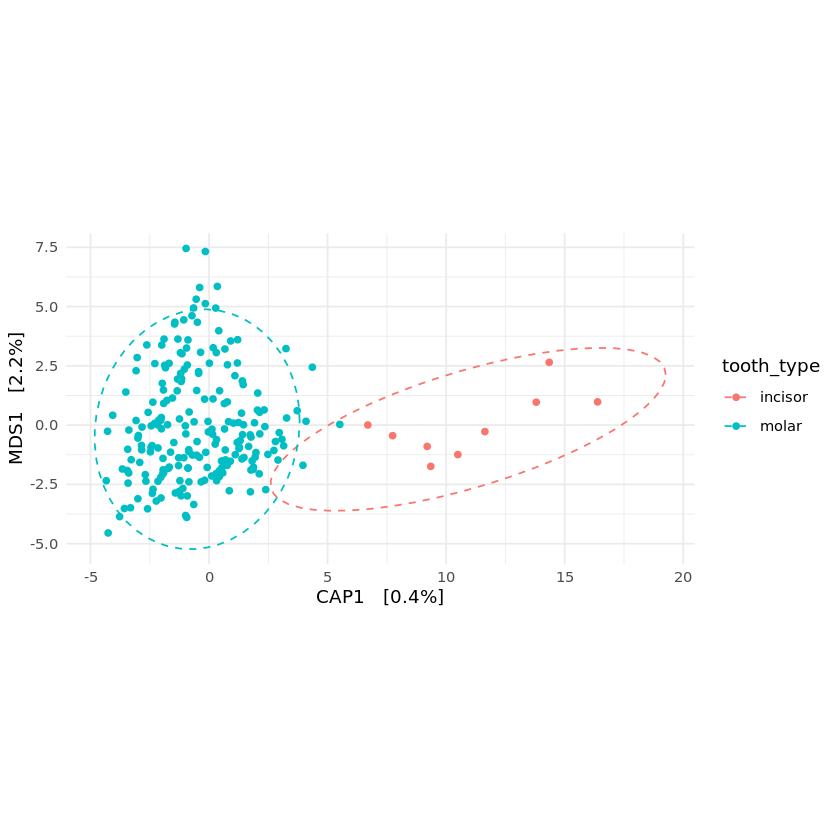

In [7]:
split <- subset_samples(temp, hiv_status=="HI")
# CAP aitchison distance
ordcap <- ordinate(split, "CAP", "euclidean", ~tooth_type)
pdf("img/bdiv_hi.hcf.pdf")
plot_ordination(split, ordcap, "samples", color="tooth_type") + 
    theme_minimal() +
    coord_fixed() +
    stat_ellipse(type="t", linetype=2)
dev.off()
plot_ordination(split, ordcap, "samples", color="tooth_type") + 
    theme_minimal() +
    coord_fixed() +
    stat_ellipse(type="t", linetype=2)
# significantly different?
permanova_pairwise(otu_table(split), grp=sample_data(split)$tooth_type, method="euclidean")

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(split)$tooth_type,1,5748.304,0.004345265,0.955766,0.637
Residual,219,1317140.958,0.995654735,NA,NA
Total,220,1322889.262,1.000000000,NA,NA


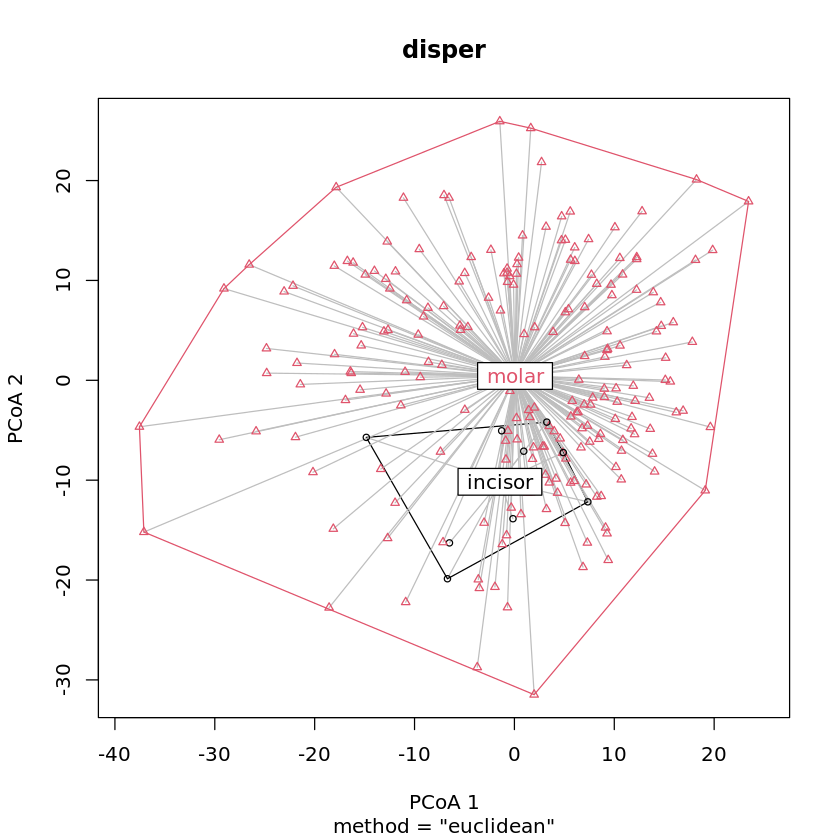

In [8]:
# now try with beta dispersion centroids
dist <- distance(split, method="euclidean", type="samples") 
disper <- betadisper(dist, group=sample_data(split)$tooth_type, type="centroid")
adonis2(dist ~ sample_data(split)$tooth_type)
plot(disper)

HEU samples

png 
  2

Now performing 1 pairwise comparisons. Percent progress:
100 ...  

p-adjust method: bonferroni 



,pairs,SumOfSqs,F.Model,R2,pval,p.adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,molar vs incisor,9720.47,1.582944,0.005661805,0.001,0.001


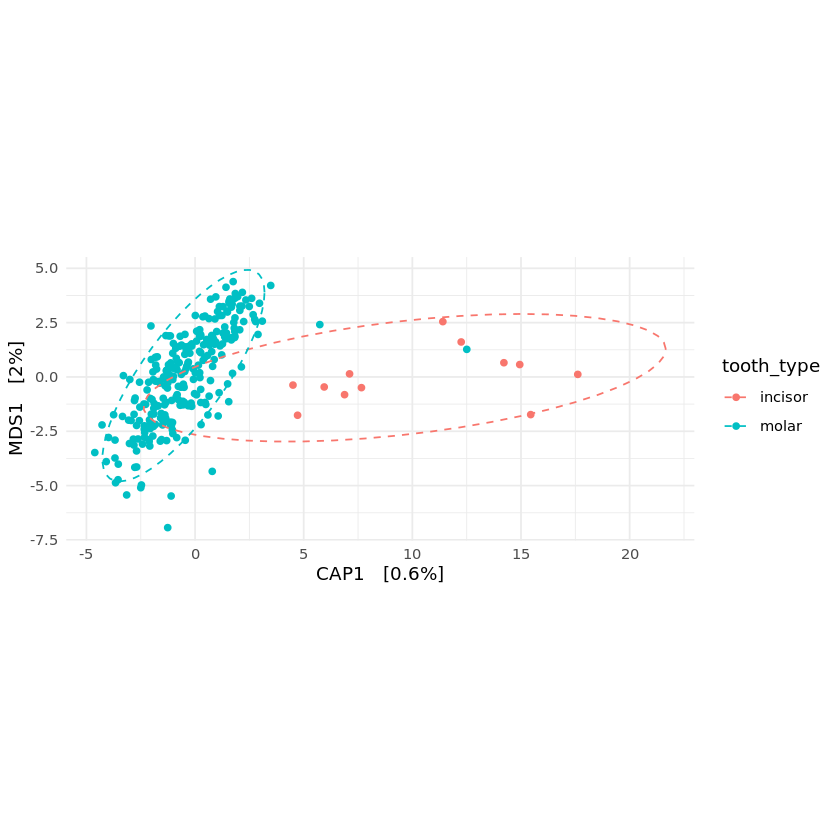

In [9]:
split <- subset_samples(ps.dat.clr, hiv_status=="HEU")
split <- subset_samples(split, aliquot_type=="H-CF")
# CAP aitchison distance
ordcap <- ordinate(split, "CAP", "euclidean", ~tooth_type)
pdf("img/bdiv_heu.hcf.pdf")
plot_ordination(split, ordcap, "samples", color="tooth_type") + 
    theme_minimal() +
    coord_fixed() +
    stat_ellipse(type="t", linetype=2)
dev.off()
plot_ordination(split, ordcap, "samples", color="tooth_type") + 
    theme_minimal() +
    coord_fixed() +
    stat_ellipse(type="t", linetype=2)
# significantly different?
permanova_pairwise(otu_table(split), grp=sample_data(split)$tooth_type, method="euclidean")

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(split)$tooth_type,1,9720.47,0.005661805,1.582944,0.001
Residual,278,1707129.44,0.994338195,NA,NA
Total,279,1716849.91,1.000000000,NA,NA


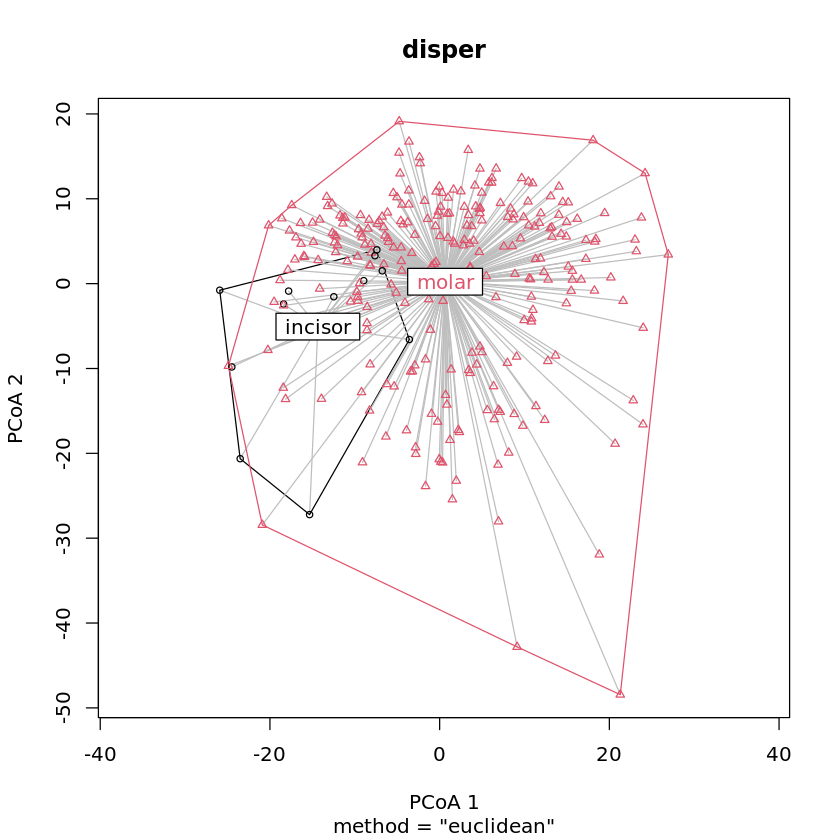

In [10]:
# now try with beta dispersion centroids
dist <- distance(split, method="euclidean", type="samples") 
disper <- betadisper(dist, group=sample_data(split)$tooth_type, type="centroid")
adonis2(dist ~ sample_data(split)$tooth_type)
plot(disper)

HUU samples

png 
  2

Now performing 1 pairwise comparisons. Percent progress:
100 ...  

p-adjust method: bonferroni 



,pairs,SumOfSqs,F.Model,R2,pval,p.adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,molar vs incisor,10205.96,1.653795,0.006225377,0.001,0.001


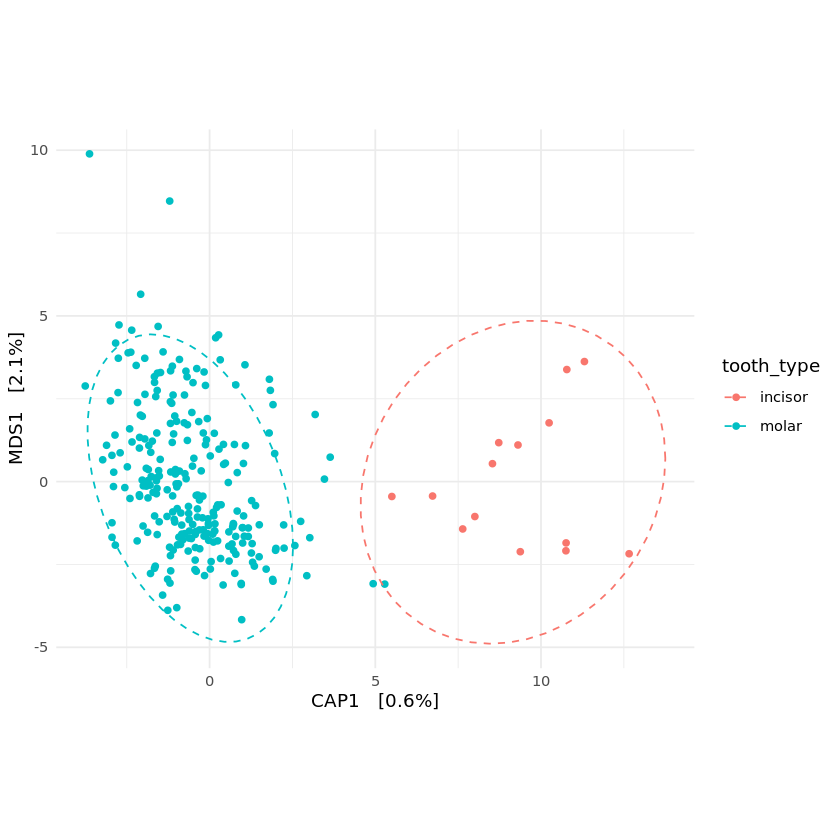

In [11]:
split <- subset_samples(ps.dat.clr, hiv_status=="HUU")
split <- subset_samples(split, aliquot_type=="H-CF")
# CAP aitchison distance
ordcap <- ordinate(split, "CAP", "euclidean", ~tooth_type)
pdf("img/bdiv_huu.hcf.pdf")
plot_ordination(split, ordcap, "samples", color="tooth_type") + 
    theme_minimal() +
    coord_fixed() +
    stat_ellipse(type="t", linetype=2)
dev.off()
plot_ordination(split, ordcap, "samples", color="tooth_type") + 
    theme_minimal() +
    coord_fixed() +
    stat_ellipse(type="t", linetype=2)
# significantly different?
permanova_pairwise(otu_table(split), grp=sample_data(split)$tooth_type, method="euclidean")

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(split)$tooth_type,1,10205.96,0.006225377,1.653795,0.001
Residual,264,1629206.53,0.993774623,NA,NA
Total,265,1639412.49,1.000000000,NA,NA


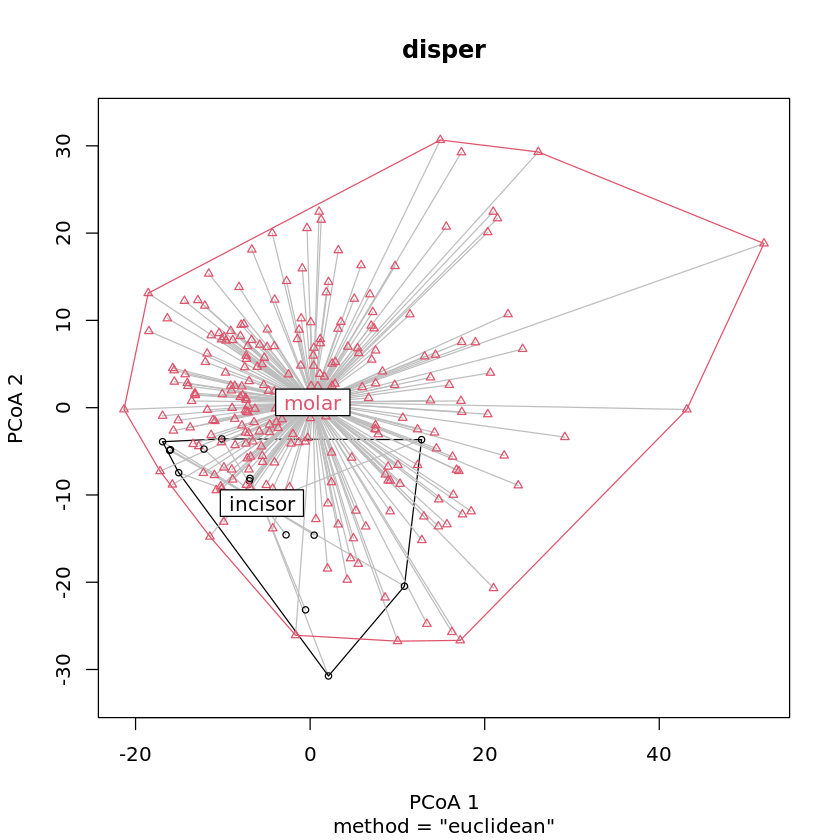

In [12]:
# now try with beta dispersion centroids
dist <- distance(split, method="euclidean", type="samples") 
disper <- betadisper(dist, group=sample_data(split)$tooth_type, type="centroid")
adonis2(dist ~ sample_data(split)$tooth_type)
plot(disper)

# 7. Tooth sampling distribution plots

For reference, which teeth were sampled and what proportion of each were found in our dataset?


Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the webr package.
  Please report the issue at <https://github.com/cardiomoon/webr/issues>.”


png 
  2

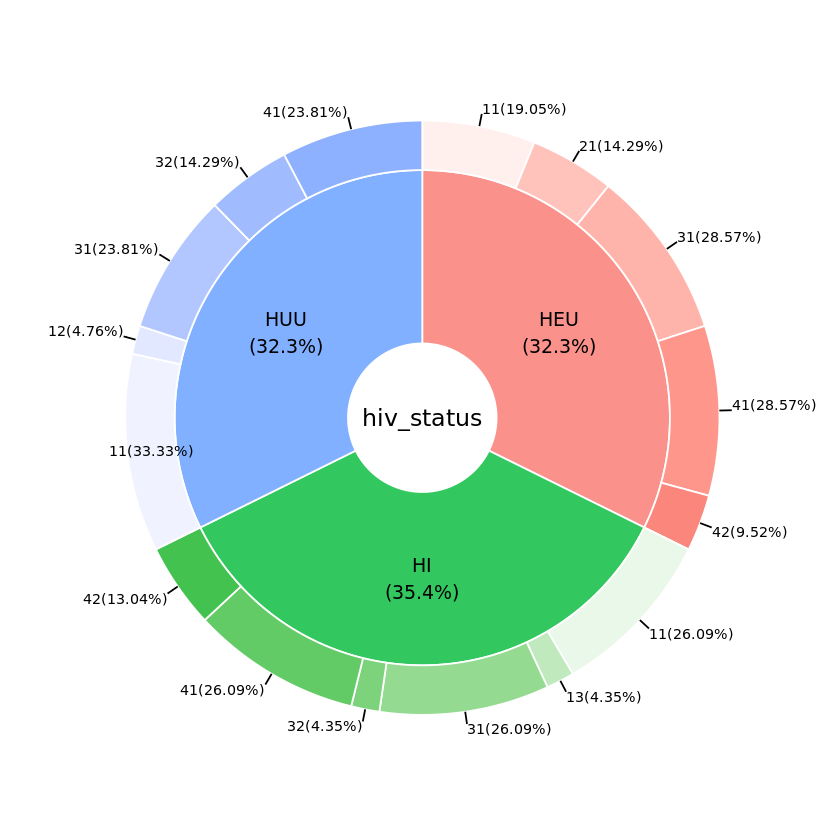

In [13]:
map <- sample_data(ps.dat)
# pull only those teeth with single FDI code
map <- map[!grepl("-", map$FDI_code)]
# only incisors first
incisors <- subset_samples(map, tooth_type == "incisor")
incisors <- as_tibble(incisors)
summed <- incisors %>%
   count(hiv_status, FDI_code)
# summed
# make donut plot
pdf("img/incisor_donut_plot.pdf")
PieDonut(summed, aes(hiv_status, FDI_code, count=n), labelpositionThreshold=0.1,showRatioThreshold = 0.01)
dev.off()
PieDonut(summed, aes(hiv_status, FDI_code, count=n), labelpositionThreshold=0.1,showRatioThreshold = 0.01)

png 
  2

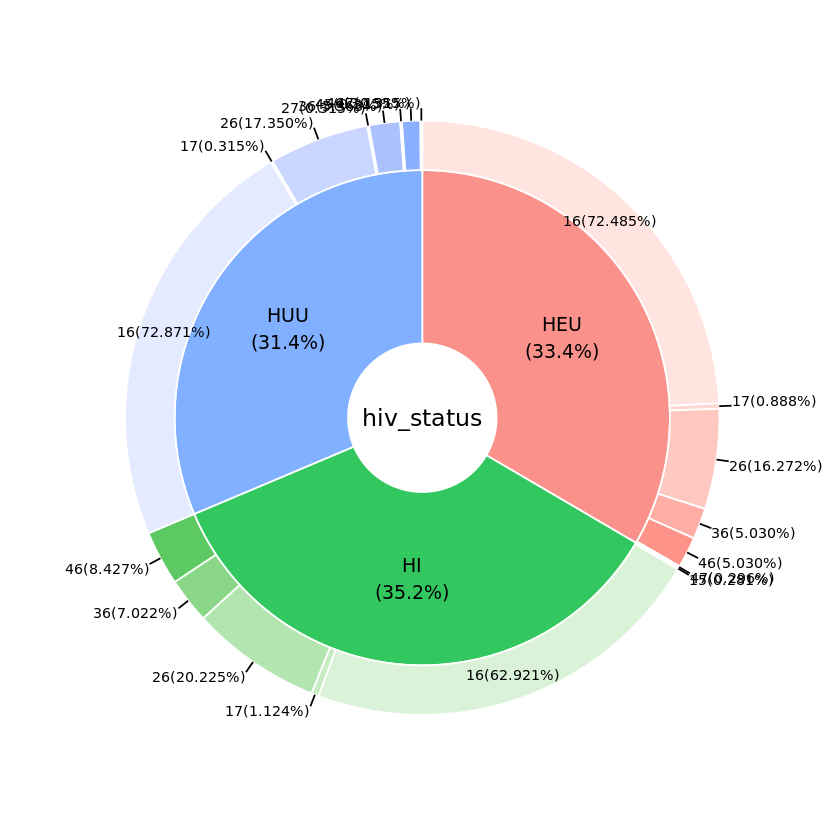

In [14]:
# same for molars
molars <- subset_samples(map, tooth_type == "molar")
molars <- as_tibble(molars)
summed <- molars %>%
   count(hiv_status, FDI_code)
# summed
# make donut plot
pdf("img/molar_donut_plot.pdf")
PieDonut(summed, aes(hiv_status, FDI_code, count=n), labelpositionThreshold=0.1,showRatioThreshold = 0.0001)
dev.off()
PieDonut(summed, aes(hiv_status, FDI_code, count=n), labelpositionThreshold=0.1,showRatioThreshold = 0.0001)